# Data Science Salaries data EDA

## Importing Libraries/Dependencies

In [1]:
#importing dependencies   
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Importing

In [2]:
#loading the dataset using read_csv() function
ds = pd.read_csv('/content/ds_salaries.csv', index_col = 0)
ds.head() #showing the first 5 rows of the dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
#showing the last 5 rows of the dataset
ds.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [ ]:
#exploring the information about the dataset columns and checking null values
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [ ]:
#exploring the dataset statistics
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


## Data Wrangling

In [ ]:
ds.shape

(607, 11)

In [ ]:
ds.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
#checking the dataset for null values
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
#counting the number of values in each column
for col in ds.columns:
  print(col)
  print('\n**************************')
  print('The number of values in this column:\n\n',ds[col].value_counts())

work_year

**************************
The number of values in this column:

 2022    318
2021    217
2020     72
Name: work_year, dtype: int64
experience_level

**************************
The number of values in this column:

 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
employment_type

**************************
The number of values in this column:

 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
job_title

**************************
The number of values in this column:

 Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist    

## Unilateral Elements


We are Checking the Pattern of the unilateral elements

<ipython-input-5-b51fbd1f3bb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['work_year'])


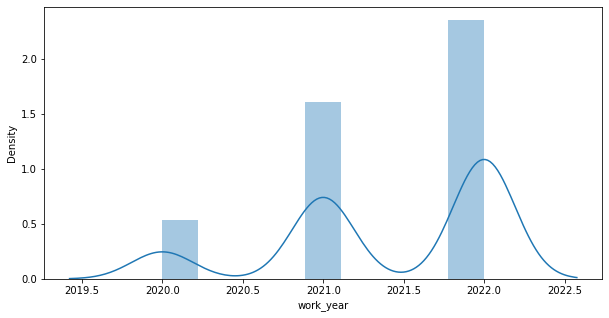

In [5]:
#plotting the density of employees for each year
plt.figure(figsize=(10,5))
sns.distplot(ds['work_year'])
plt.show() #this function is used to display the plot only and remove unwanted comments

In [ ]:
#counting how many employees for each experience level
e = ds['experience_level'].value_counts()
#converting series into a dataframe and resetting index to 0,1,2...
e.to_frame().reset_index()

,index,experience_level
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [ ]:
#counting how many employees that receives a particular amount of salary
s = ds['salary'].value_counts()
s.to_frame().reset_index()

,index,salary
0,100000,18
1,80000,18
2,120000,15
3,60000,15
4,150000,14
...,...,...
267,256000,1
268,39600,1
269,1335000,1
270,52500,1


<ipython-input-6-65b26e0fa857>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['salary'])


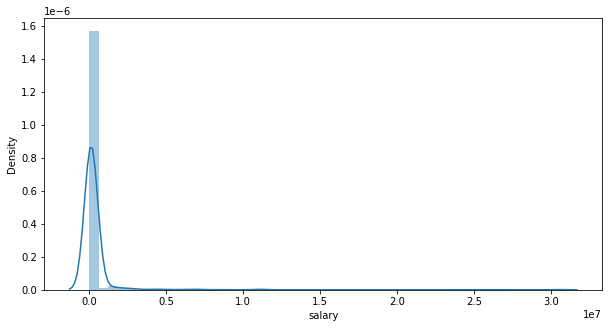

In [6]:
#plotting the density of employees with the paid salary
plt.figure(figsize = (10,5))
sns.distplot(ds['salary'])
plt.show()

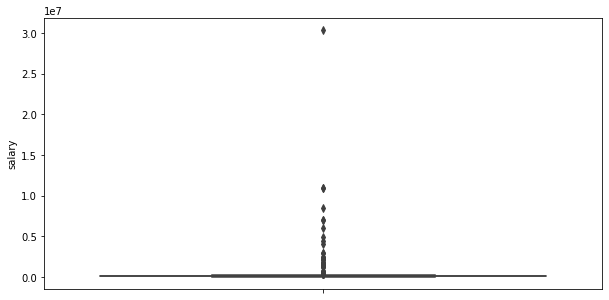

In [7]:
#observing outliers with boxplot graph for the salary 
plt.figure(figsize = (10,5))
sns.boxplot(y = 'salary', data = ds)
plt.show()

<ipython-input-8-d5c01734c758>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["salary_in_usd"])


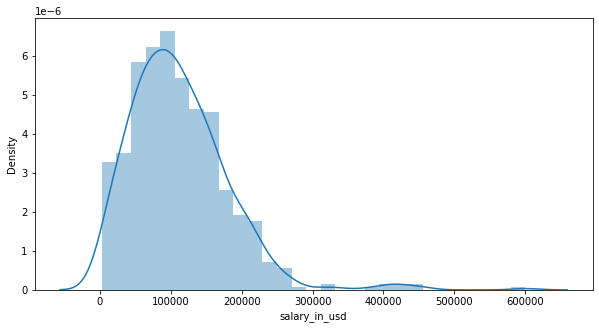

In [8]:
#plotting the density of employees with the paid salary in USD currency
plt.figure(figsize=(10,5))
sns.distplot(ds["salary_in_usd"])
plt.show()

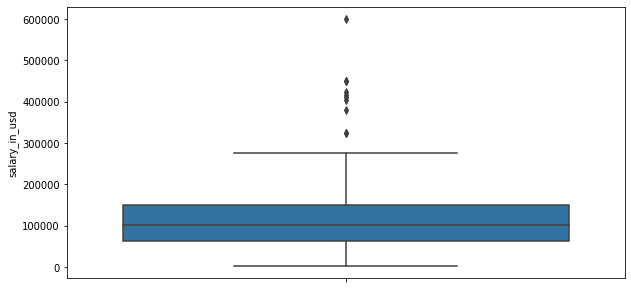

In [9]:
#observing outliers with boxplot graph for the salary in USD currency
plt.figure(figsize=(10,5))
sns.boxplot(y="salary_in_usd", data=ds)
plt.show()

<ipython-input-10-50bb6405f115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['remote_ratio'])


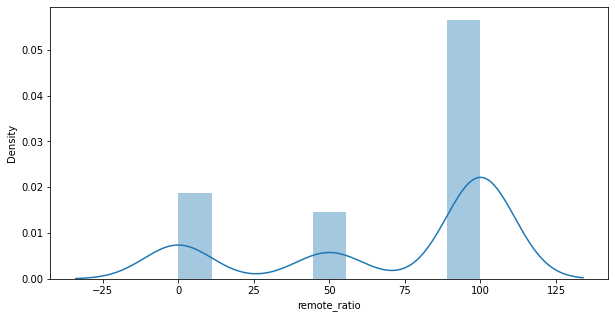

In [10]:
#plotting the density of employees with a particular remote ratio
plt.figure(figsize = (10,5))
sns.distplot(ds['remote_ratio'])
plt.show()

## Unilateral/Multilateral Elements

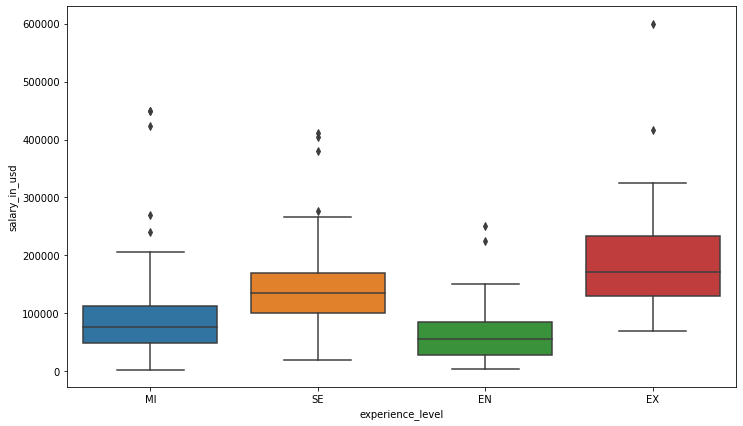

In [ ]:
#comparing the amount of salary in USD currency in relation to the employees experience level and observing outliers
plt.figure(figsize = (12,7))
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', data = ds)
plt.show()

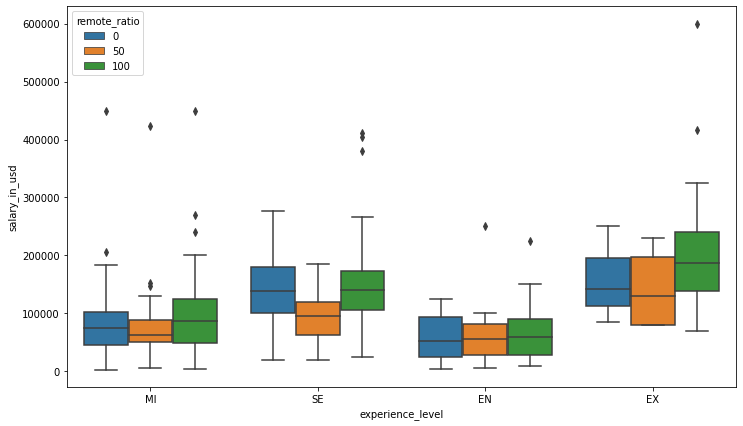

In [ ]:
#comparing the amount of salary in USD currency in addition to the remote ratio in relation to the employees experience level and observing outliers
plt.figure(figsize=(12,7))
sns.boxplot(x = 'experience_level', y = 'salary_in_usd', hue = 'remote_ratio', data = ds)
plt.show()

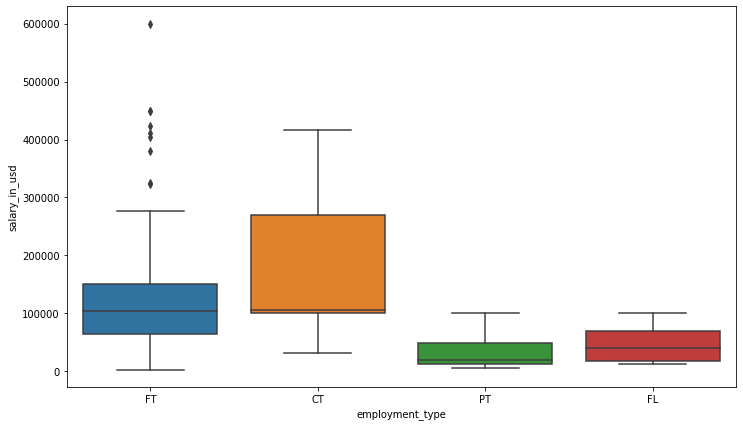

In [ ]:
#comparing the amount of salary in USD currency in relation to the employment type and observing outliers
plt.figure(figsize = (12,7))
sns.boxplot(x = 'employment_type', y = 'salary_in_usd', data = ds)
plt.show()

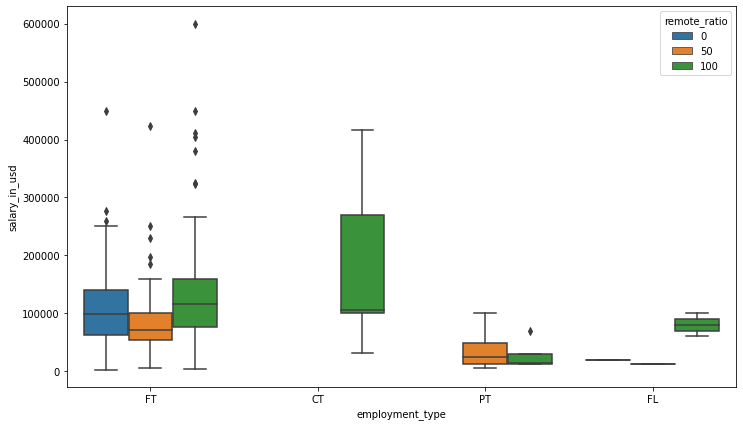

In [ ]:
#comparing the amount of salary in USD currency in addition to the remote ratio in relation to the employment type and observing outliers
plt.figure(figsize = (12,7))
sns.boxplot(x = 'employment_type', y = 'salary_in_usd', hue = 'remote_ratio', data = ds)
plt.show()

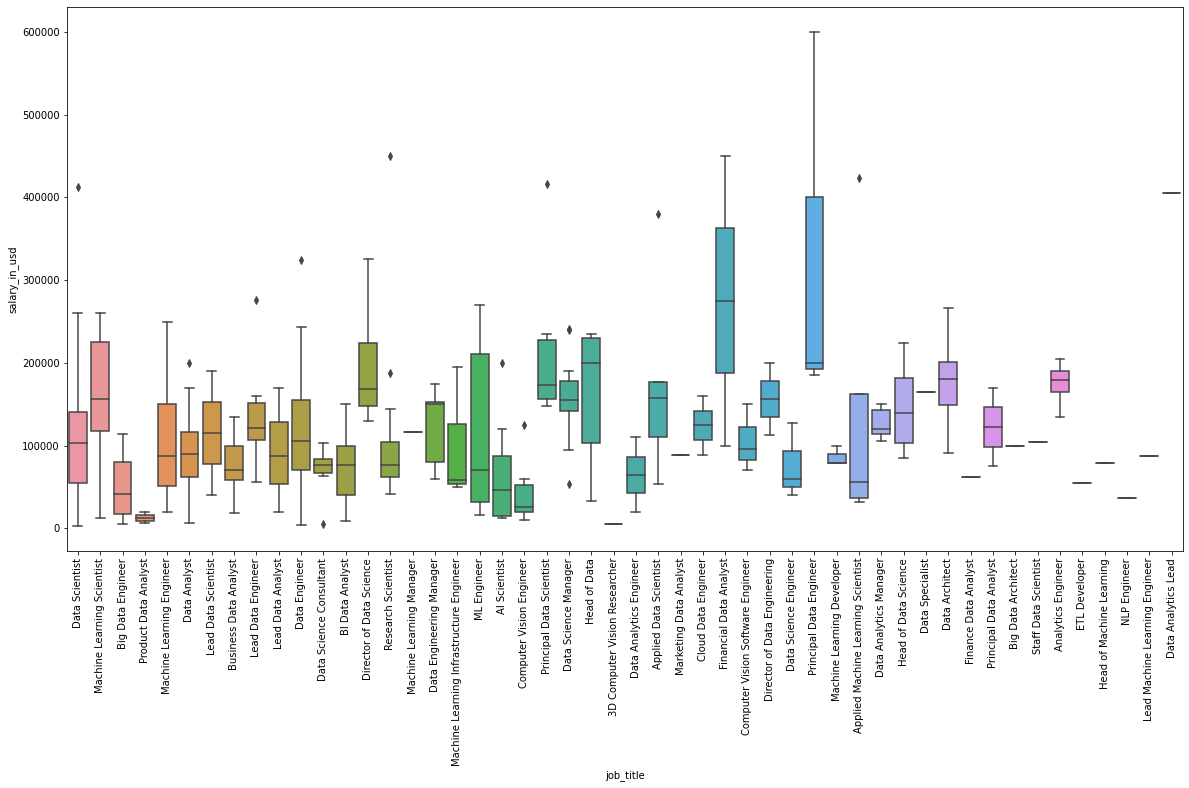

In [ ]:
#comparing the amount of salary in USD currency in relation to the job title and observing outliers
plt.figure(figsize=(20,10))
sns.boxplot(x='job_title',y='salary_in_usd', data=ds)
plt.xticks(x ='job_title',rotation='vertical')
plt.show()

In [ ]:
#filtering the top 10 jobs within the dataset by relying on the number of employees occupying that position
first_10_jobs = ds['job_title'].value_counts()[:10].keys()
filtered_jobs = ds[ds['job_title'].isin(first_10_jobs)]
filtered_jobs['job_title'].value_counts()

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Principal Data Scientist        7
Name: job_title, dtype: int64

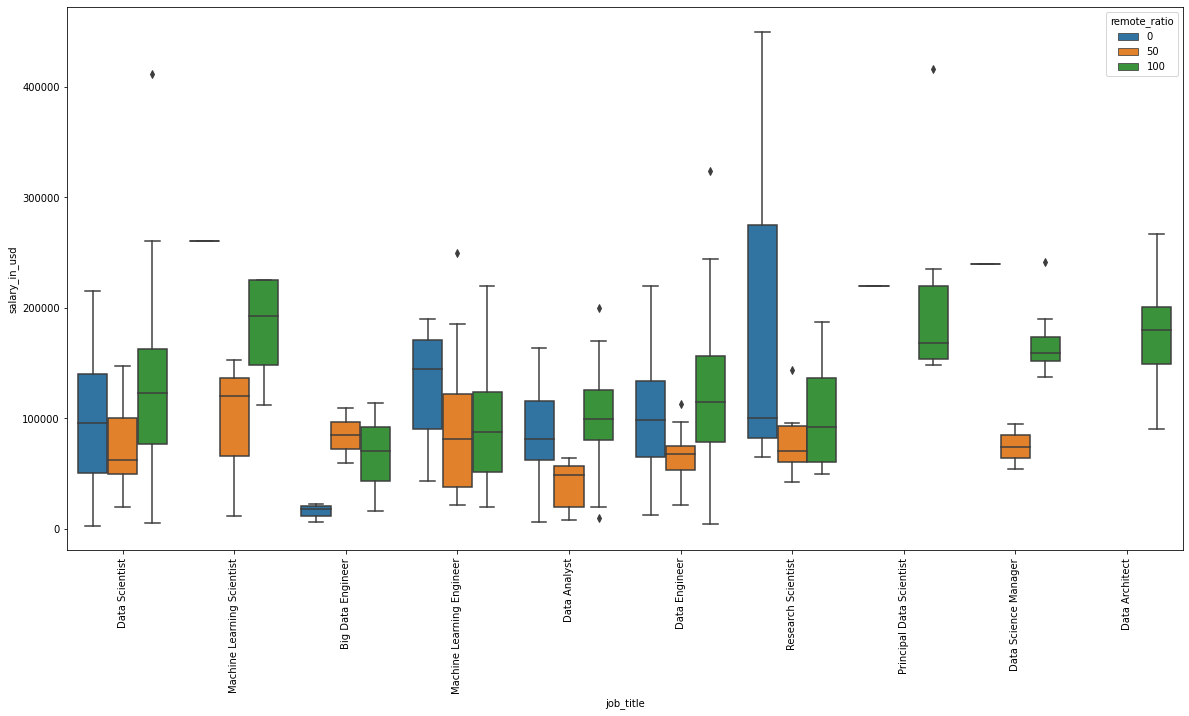

In [ ]:
#comparing the amount of salary in USD currency in addition to the remote ratio in relation to the top 10 job titles and observing outliers
plt.figure(figsize=(20,10))
sns.boxplot(x='job_title', y = 'salary_in_usd', hue = 'remote_ratio', data = filtered_jobs)
plt.xticks(x='job_title', rotation = 'vertical')
plt.show()

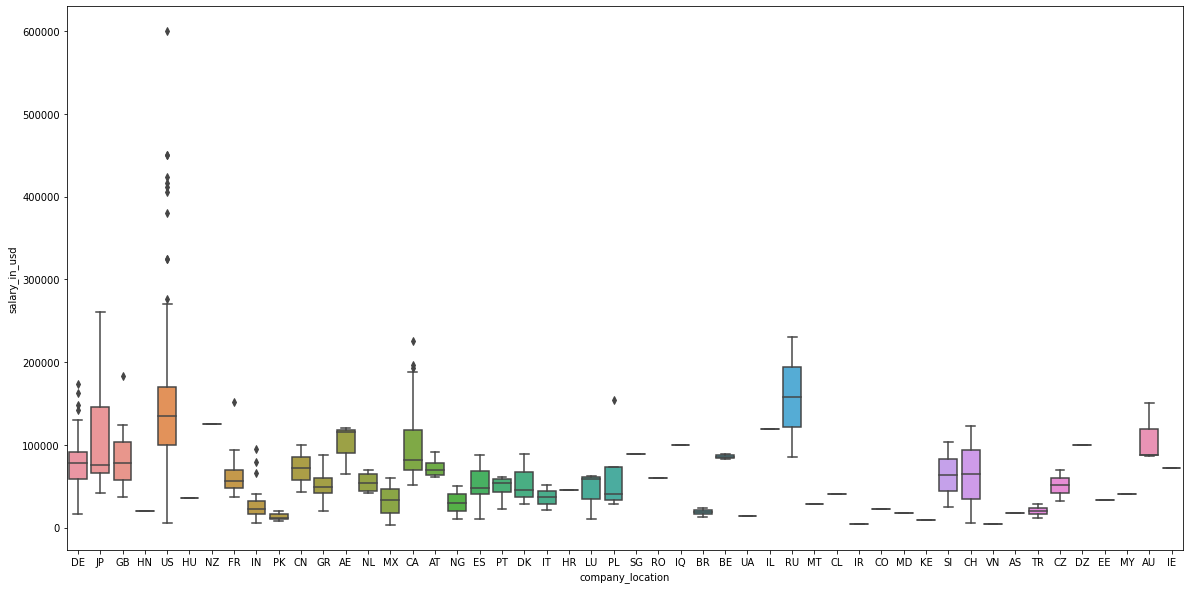

In [ ]:
#observing outliers with boxplot graph for the salary in USD currency in relation to the company location
plt.figure(figsize=(20,10))
sns.boxplot(x='company_location', y='salary_in_usd', data = ds)
plt.show()

In [13]:
#filtering the top 10 locations within the dataset by relying on the number of employees from the particular location
first_10_locations = ds['company_location'].value_counts()[:10].keys()
filtered_locations = ds[ds['company_location'].isin(first_10_locations)]
filtered_locations['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: company_location, dtype: int64

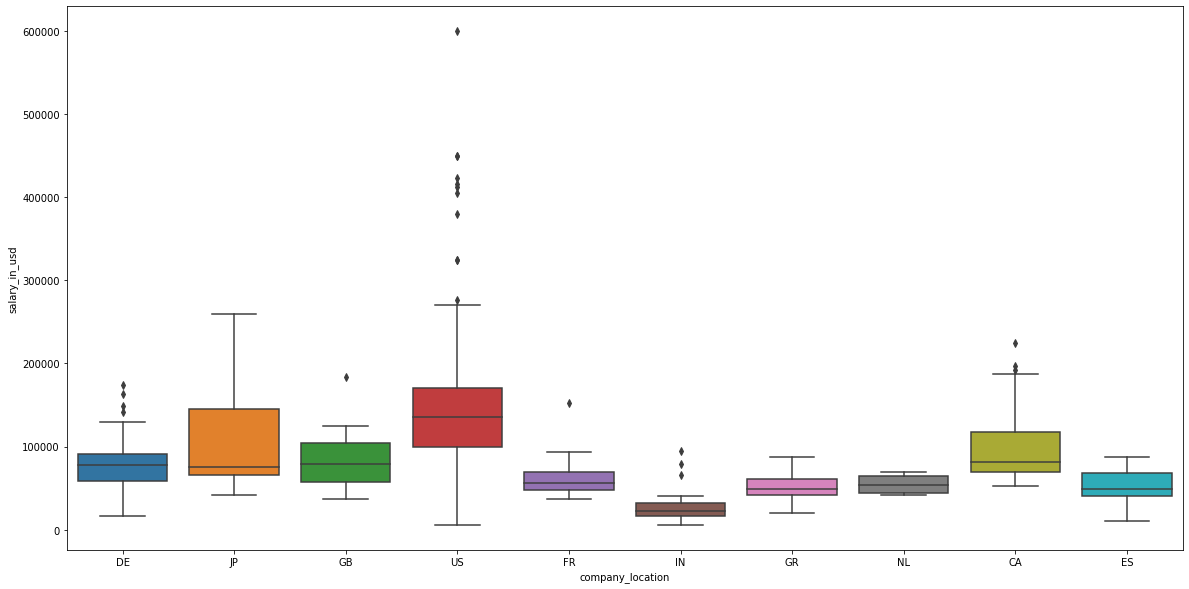

In [ ]:
#comparing the amount of salary in USD currency in addition to the remote ratio in relation to the top 10 locations and observing outliers
plt.figure(figsize=(20,10))
sns.boxplot(x='company_location', y='salary_in_usd', data=filtered_locations)
plt.show()

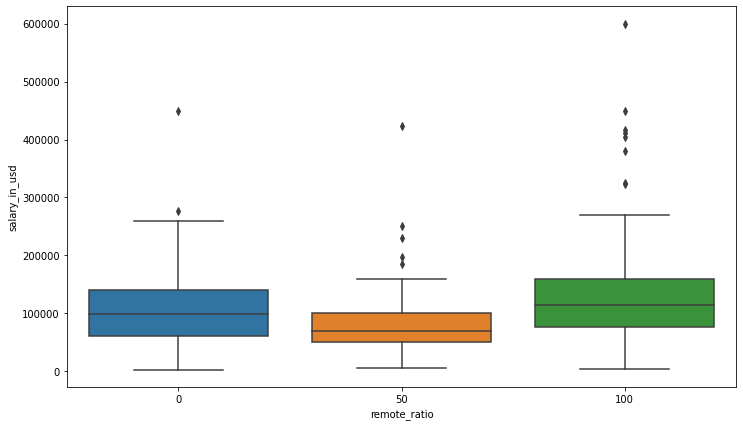

In [ ]:
#comparing the amount of salary in USD currency with the remote ratio and observing outliers
plt.figure(figsize=(12,7))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data = ds)
plt.show()

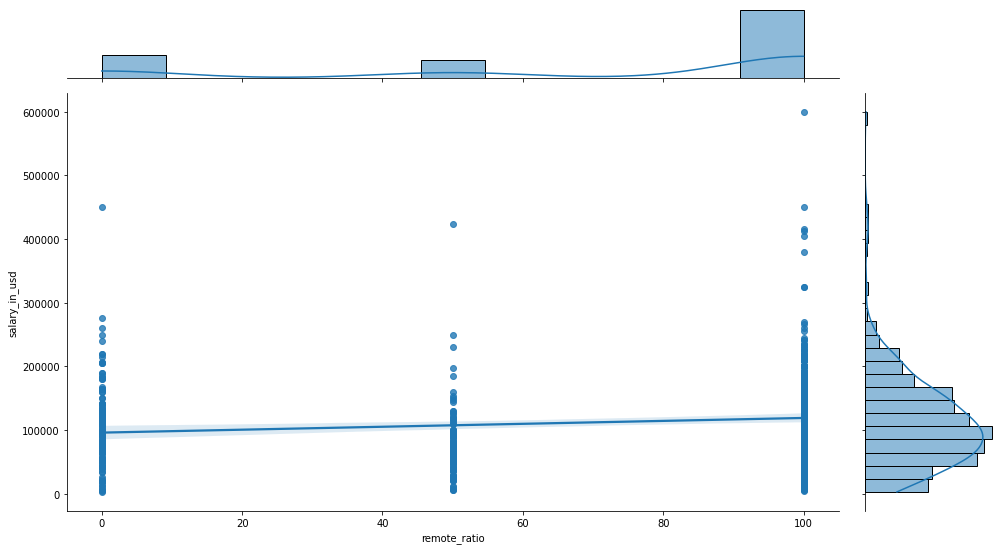

In [11]:
#comparing the amount of salary in USD currency with the remote ratio and observing outliers in different plots joined together
g = sns.jointplot(x='remote_ratio', y='salary_in_usd', data=ds, kind='reg')
g.fig.set_size_inches(15,8)
plt.show()

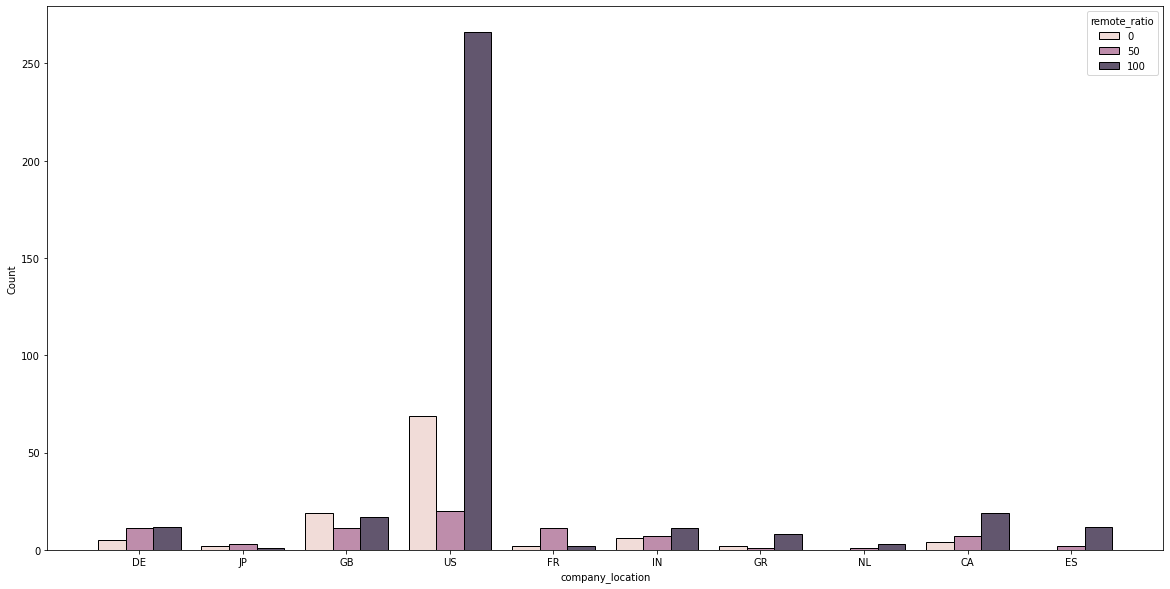

In [ ]:
#counting the amount of salary in USD currency in addition to the remote ratio for the employees 
plt.figure(figsize=(20,10))
ax = sns.histplot(x='company_location', hue='remote_ratio', data = filtered_locations, multiple='dodge', shrink=.8)
plt.show()

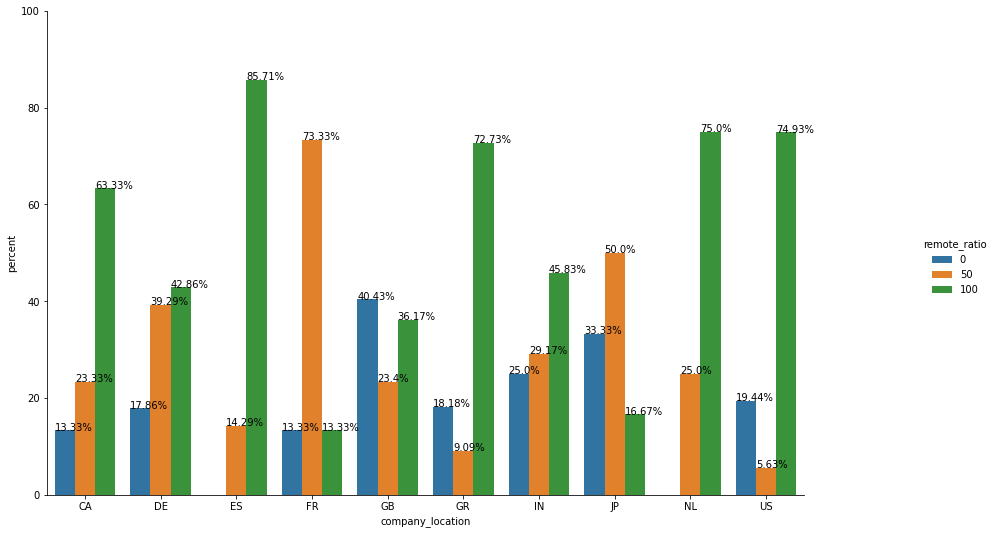

In [15]:
#showing the percentage of employees for each company location in addition to their remote ratio
x,y = 'company_location','remote_ratio'

f=(filtered_locations.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
.pipe((sns.catplot,'data'),x=x, y='percent', hue=y, kind='bar'))

#changing the plot measurment units to inches to be able to extend the size of the plot
f.fig.set_size_inches(15,8)
f.ax.set_ylim(0,100)

#looping through each column to add the perecentage value on top
for p in f.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    f.ax.text(txt_x,txt_y,txt)

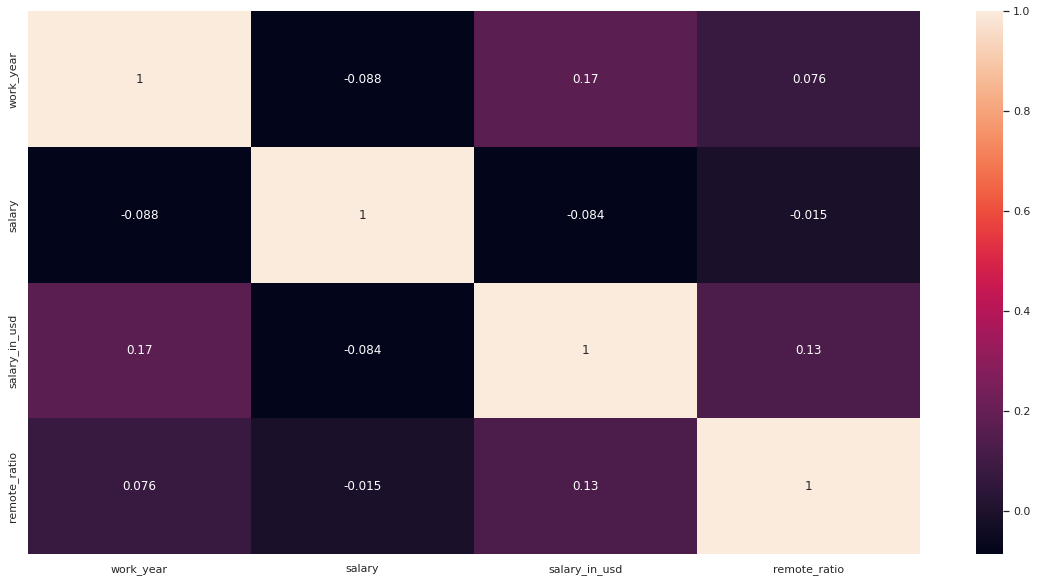

In [ ]:
#forming a correlation between the dataset columns to display the heatmap of the dataset
plt.figure(figsize=(20,10))
corr = ds.corr()
sns.set(style='darkgrid')
sns.heatmap(corr, annot=True)
plt.show()